In [ ]:
from google.colab import files

uploaded = files.upload()

Saving FNA-20231211T101134Z-001.zip to FNA-20231211T101134Z-001.zip


In [ ]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['FNA-20231211T101134Z-001.zip']), 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')

In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'dataset_folder',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'dataset_folder',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1390 images belonging to 1 classes.
Found 347 images belonging to 1 classes.


In [ ]:
# Assuming 'benign' and 'malignant' are your class subfolders
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'dataset_folder',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'dataset_folder',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1390 images belonging to 1 classes.
Found 347 images belonging to 1 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(2, 2))

# Add more convolutional layers as needed

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs=10

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset_folder',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

predictions = model.predict(test_generator)

Found 1737 images belonging to 1 classes.
55/55 [==============================] - 32s 570ms/step


In [ ]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
44/44 [==============================] - 112s 2s/step - loss: 0.0093 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
44/44 [==============================] - 104s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
44/44 [==============================] - 105s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 109s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 106s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 107s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 110s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l

In [ ]:
validation_evaluation = model.evaluate(validation_generator)
print("Validation Accuracy:", validation_evaluation[1])

11/11 [==============================] - 7s 589ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 1.0


In [ ]:
model.save('breast_cancer_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


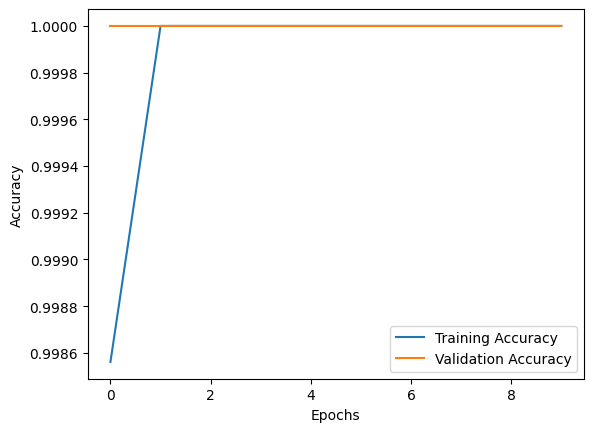

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset_folder',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

predictions = model.predict(test_generator)

Found 1737 images belonging to 1 classes.
55/55 [==============================] - 27s 494ms/step


In [ ]:
from google.colab import files

uploaded_test = files.upload()

Saving 10253_idx5_x651_y351_class1.png to 10253_idx5_x651_y351_class1.png


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming 'img_height' and 'img_width' are the dimensions used during training
img_path = list(uploaded_test.keys())[0]
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1, assuming your model was trained with this normalization

In [ ]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 92ms/step


In [ ]:
predictions = model.predict(test_generator)

for i in range(len(predictions)):
    print(f"Sample {i + 1}: Predicted Probabilities = {predictions[i]}")

55/55 [==============================] - 38s 684ms/step
Sample 1: Predicted Probabilities = [0.]
Sample 2: Predicted Probabilities = [0.]
Sample 3: Predicted Probabilities = [0.]
Sample 4: Predicted Probabilities = [0.]
Sample 5: Predicted Probabilities = [0.]
Sample 6: Predicted Probabilities = [0.]
Sample 7: Predicted Probabilities = [0.]
Sample 8: Predicted Probabilities = [0.]
Sample 9: Predicted Probabilities = [0.]
Sample 10: Predicted Probabilities = [0.]
Sample 11: Predicted Probabilities = [0.]
Sample 12: Predicted Probabilities = [0.]
Sample 13: Predicted Probabilities = [0.]
Sample 14: Predicted Probabilities = [0.]
Sample 15: Predicted Probabilities = [0.]
Sample 16: Predicted Probabilities = [0.]
Sample 17: Predicted Probabilities = [0.]
Sample 18: Predicted Probabilities = [0.]
Sample 19: Predicted Probabilities = [0.]
Sample 20: Predicted Probabilities = [0.]
Sample 21: Predicted Probabilities = [0.]
Sample 22: Predicted Probabilities = [0.]
Sample 23: Predicted Probabil